In [15]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import normalize

In [2]:
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

In [3]:
data_69 = normalize(np.array([digits_data[i] for i in range(1797) if digits_label[i] == 6 or digits_label[i]==9]), norm='l1')
label_69 = np.array([digits_label[i] for i in range(1797) if digits_label[i] == 6 or digits_label[i]==9])

In [4]:
def partition_func(l,y):
    return np.sum(np.exp(-np.dot(l,y)),axis=1)

In [5]:
def q_calc(l,y):
    z = partition_func(l,y)
    return np.exp(-np.dot(l,y))/z[:,None]

In [6]:
def loss(data, l, y): 
    z = partition_func(l,y)
    term_1 = np.sum(np.log(z))
    term_2 = np.sum(np.multiply(data,np.dot(l,y)))
    return term_1 + term_2

In [10]:
def grad_decent_step(l,Y,data,eta):
    pred = q_calc(l,Y)
    dcdl = np.dot(data,Y.T) - np.dot(pred,Y.T)
    dcdy = np.dot(l.T,data) - np.dot(l.T,pred)
    dcdlnorm = norm(dcdl)/norm(l)
    dcdynorm = norm(dcdy)/norm(Y)
    l = l - eta*dcdl
    Y = Y - eta*dcdy 
    return l, Y, dcdlnorm, dcdynorm

In [11]:
def grad_decent(l,Y,data,eta,n):
    loss_list = []
    dcdl_list = []
    dcdy_list = []
    for i in range(n):
        l, Y, dcdl, dcdy = grad_decent_step(l,Y,data_69,0.01)
        dcdl_list.append(dcdl)
        dcdy_list.append(dcdy)
        loss_list.append(loss(data_69, l, Y))
    return loss_list, dcdl_list, dcdy_list, l, Y

In [12]:
lamb = np.random.default_rng().uniform(0.2,0.5,(361,2))
y = np.random.default_rng().uniform(0.2,0.5,(2,64))

In [16]:
loss_list, dcdl_list, dcdy_list, lamb, y = grad_decent(lamb, y, data_69, 0.01,1000)

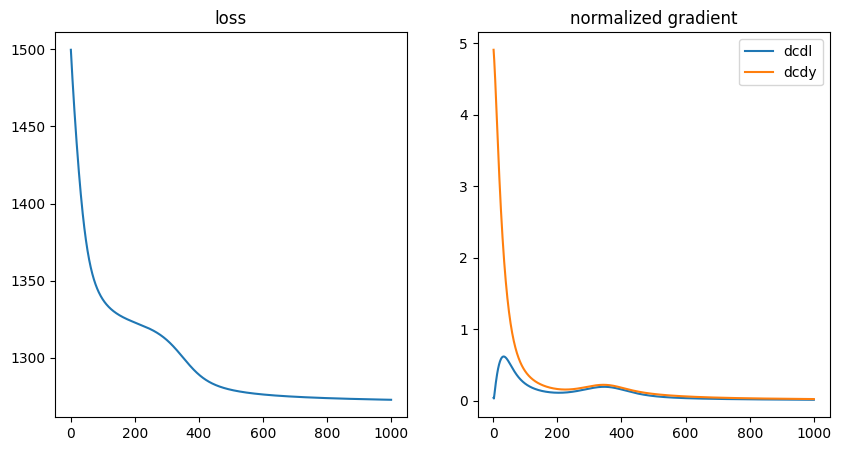

In [17]:
x = np.linspace(1,1000,1000)
fig, axis = plt.subplots(1,2,figsize=(10,5))
axis[0].plot(x,loss_list)
axis[0].set_title('loss')
axis[1].plot(x,dcdl_list, label='dcdl')
axis[1].set_title('normalized gradient')
axis[1].plot(x,dcdy_list, label='dcdy')
plt.legend()
plt.show()

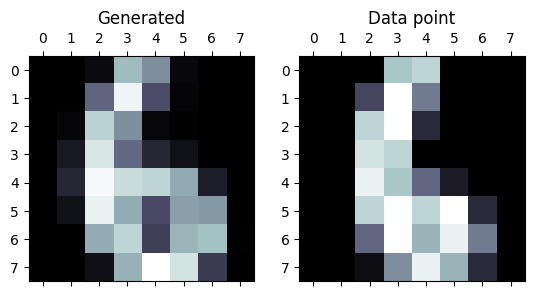

In [58]:
fig, axis = plt.subplots(1,2)
axis[0].matshow(q_calc(lamb,y)[0].reshape(8,8),cmap='bone')
axis[0].set_title("Generated")
axis[1].matshow(data_69[0].reshape(8,8),cmap='bone')
axis[1].set_title("Data point")
plt.show()

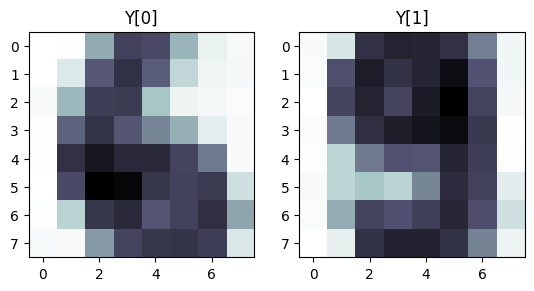

In [56]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(y[0].reshape(8,8), cmap='bone', interpolation='nearest')
axis[1].imshow(y[1].reshape(8,8), cmap='bone', interpolation='nearest')
axis[0].set_title("Y[0]")
axis[1].set_title("Y[1]")
#axis[0].tick_params(left= False, top = False)
#axis[1].tick_params(left= False, top = False)
plt.show()